<a href="https://colab.research.google.com/github/mario-i-caicedo-ai/Ondas-y-Optica/blob/main/Ondas_y_%C3%93ptica_Oscilaciones_Amortiguadas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ondas y Óptica

## Oscilaciones Amortiguadas

### Prof. Mario I. Caicedo




Objetivo de este cuaderno: 

* Considerando la ecuación de oscilaciones amortiguadas

$$\ddot{x}+2\beta{}\dot{x}+\omega_0^2\,x(t)=0$$

* Y los tres regímenes

  * Subamortiguamiento $\beta^2<\omega_0^2$
  * Amortiguamiento crítico $\beta^2=\omega_0^2$
  * Sobreamortiguamiento $\beta^2>\omega_0^2$

* Mostrar el comportamiento de las soluciones correspondientes

  $$x(t)=e^{-\beta{}t}\,cos(\sqrt{\omega_0^2-\beta^2}\,t+\phi)$$


  $$x(t)=(A+Bt)e^{-\beta{}t}$$


  $$x(t)=(A_+e^{\omega_2t}+A_-e^{-\omega_2t})e^{-\beta{}t}$$

para las condiciones iniciales:

$x(0)=1$, $\dot{x}(0)=0$

## Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definiendo $x(t)$

In [2]:
def x_sub(tiempo,beta,omega_0,phi):
  omega_1=np.sqrt(omega_0**2-beta**2)
  xt=np.exp(-beta*tiempo)*np.cos(omega_1*tiempo+phi)
  return xt

In [3]:
def x_crit(tiempo,beta,A,B):
  xt=np.exp(-beta*tiempo)*(A+B*tiempo)
  return xt

In [4]:
def x_sobre(tiempo,beta,omega_0,A_1,A_2):
  omega_2=np.sqrt(beta**2-omega_0**2)
  xt=np.exp(-beta*tiempo)*(A_1*np.exp(omega_2*tiempo)+A_2*np.exp(-omega_2*tiempo))
  return xt

Estas dos instrucciones definen

* El intervalo temporal que queremos estudiar definido como un arreglo de valores entre 0 y 2 espaciados en un intevalo deltat 

In [5]:
deltat=0.01
tiempo = np.arange(0.0, 1.0, deltat) 
x_t=np.zeros(len(tiempo),float)

Parametrización del sistema

Recordar que la frecuencia angular está dada por $\omega_0=2\pi{}f$

Si ponemos $f=frec=4$ y $\beta=0$ deberíamos ver 8 ciclos completos.
Si pensamos que el tiempo está en segundos, la frecuencia estará en Hertz (1/s)


In [6]:
frec=4. #Hz
omega_0=2*np.pi*frec

Definiendo $\beta$ para los regímenes de interés.

* Subamortiguamiento  $\omega_0^2>\beta^2$
* Amortiguamiento crítico $\omega_0^2=\beta^2$
* Sobreamortiguamiento $\omega_0^2<\beta^2$


In [7]:
beta_sub=0.08*omega_0
#beta_crit=omega_0
beta_sobre=2.*omega_0

Calculo de las series de datos de las soluciones en los tres regímenes recuérdese que las condiciones iniciales son $x(0)=1$, $\dot{x}(0)=0$

In [8]:
phi=0 # Esta escogencia satisface las C.I.
x_s=x_sub(tiempo,beta_sub,omega_0,phi)

In [9]:
A=1.
B=1.
x_c=x_crit(tiempo,omega_0,A,B)

In [10]:
omega_2=np.sqrt(beta_sobre**2-omega_0**2)
A_1=(beta_sobre+omega_2)/(2.*omega_2)
A_2=(omega_2-beta_sobre)/(2.*omega_2)
x_sob=x_sobre(tiempo,beta_sobre,omega_0,A_1,A_2)

Graficación

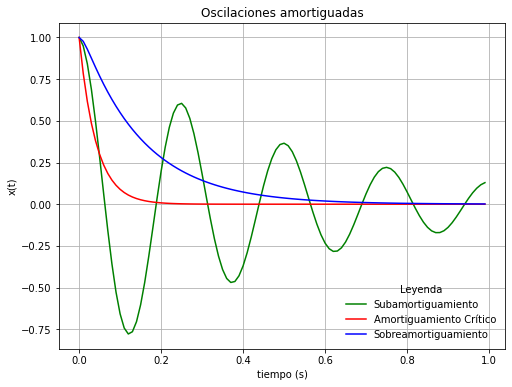

In [11]:
fig, ax= plt.subplots(1,figsize=(8, 6))

ax.plot(tiempo, x_s, color="green", label="Subamortiguamiento")
ax.plot(tiempo, x_c, color="red", label="Amortiguamiento Crítico")
ax.plot(tiempo, x_sob, color="blue", label="Sobreamortiguamiento")


ax.set(xlabel='tiempo (s)', ylabel='x(t)',
       title='Oscilaciones amortiguadas')
ax.grid()

plt.legend(loc="lower right", title="Leyenda", frameon=False)
fig.savefig("test.png")
plt.show()

## Ejercicios:

1. Corra el cuaderno cambiando los valores de beta y de una interpretación física de sus resultados **[extra: incluya unas líneas de código que le permitan hacer estos cambios de fomra interactiva]**

2. ¿Qué ocurre si cambia las condiciones iniciales incluyendo una velocidad inicial dirigida hacia el punto de equilibrio?

3. Incluya en el gráfico la envolvente de la ley de movimiento en el caso **subamortiguado**

4. Haga una función que calcule $\dot{x}(t)$

5. Use matplotlib para hacer gráficos de $\dot{x}(t)$ vs $x(t)$ [apóyese en el ejemplo que sigue]


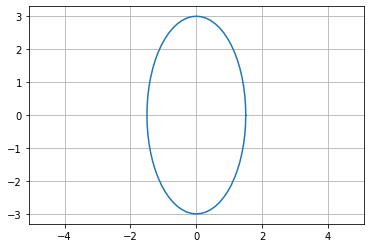

In [12]:
# Graficación paramétrica de una ELIPSE

n=64

t=np.linspace(0.,2.*np.pi,n+1) # Parámetro

x=1.5*np.cos(t)

y=3.*np.sin(t)

plt.grid()
plt.axis("equal")
plt.plot(x,y)
plt.show()